In [7]:
import gudhi
import wfdb 
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [23]:
signals, fields = wfdb.rdsamp('data/arrhythmia/100', channels=[0], sampfrom=50, sampto=100)

In [24]:
def quasi_attractorize(series, step):
    n = series.shape[0]

    z = []
    for i in range(n - step + 1):
        z.append(series[i:i + step].reshape(1, 3)[0])

    return np.array(z)

In [25]:
attractor = quasi_attractorize(signals, 3)

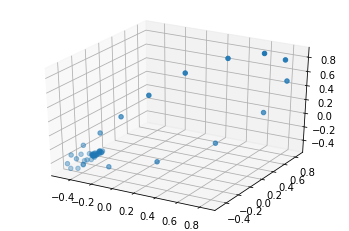

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(xs=attractor[:, 0],
           ys=attractor[:, 1],
           zs=attractor[:, 2])
plt.show()

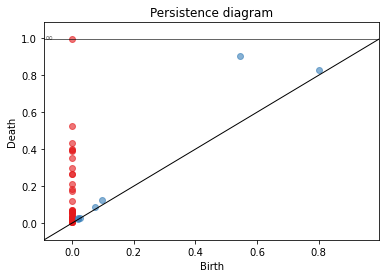

In [31]:
rips = gudhi.RipsComplex(points=attractor)
simplex_tree = rips.create_simplex_tree(max_dimension=2)

diag = simplex_tree.persistence()
gudhi.plot_persistence_diagram(diag)